In [105]:
from math import sqrt, exp, log
from datetime import timedelta as _timedelta, datetime as _datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from os.path import join as j
import os
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [8,4]

# Create Path Charts and Display

In [106]:
fn = "RANPTH-05000-0000.pickle"
fn0 = fn.split(".")[0]

In [107]:
!ls *.pickle

RANPTH-00500-0000.pickle RANPTH-02000-0000.pickle RANPTH-07500-0000.pickle
RANPTH-01000-0000.pickle RANPTH-05000-0000.pickle RANPTH-10000-0000.pickle


## Setup

In [108]:
OUTPATH = "charts"
OUTPATH = None
if OUTPATH:
    pass
    !rm {OUTPATH}/*.png

In [109]:
!ls charts

RANPTH-02000-0000.pdf RANPTH-05000-0000.pdf RANPTH-07500-0000.pdf


## Code

### Data retrieval code

In [110]:
def dfread(fn):
    """reads dataframe from file and asserts format"""
    
    if fn[-7:] == ".pickle":
        df = pd.read_pickle(fn)
    else:
        df = pd.read_csv(fn)
    assert df.columns[0] == "time"
    assert df.columns[1] == "datetime"
    return df
    
def pdread(fn, datacol=None, indexcol=None):
    """
    reads a dataframe and returns a single column with index
    
    :fn:        the (full) filename
    :datacol:   name or index of the data col; None returns frame
    :indexcol:  name of the index col (default: "datetime")
    :returns:   pandas series
    """
    if indexcol is None: indexcol = "datetime"

    df = dfread(fn)
    df = df.set_index(indexcol)
    if datacol is None:
        return df.iloc[:, 1:]
    elif isinstance(datacol, str):
        return df[datacol]
    elif isinstance(datacol, int):
        return df.iloc[:, datacol+1]
    else:
        raise ValueError("datacol must be None, str or int", datacol)

def pdcols(fn):
    """
    reads a dataframe and returns a single column with index
    
    :fn:        the (full) filename
    :returns:   the column names (excluding the first two)
    """
    return dfread(fn).columns[2:]

def pathtime(path):
    """returns the time (in years) covered by the series `path`"""
    (path.index[-1]-path.index[0])/pd.Timedelta(days=1)/365.25

## Plot data

In [111]:
cols = pdcols(fn)

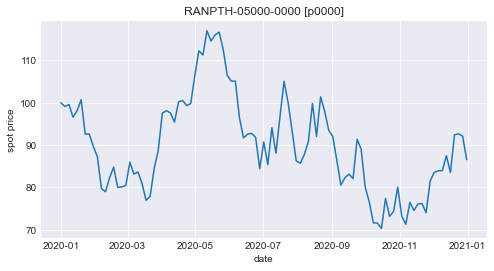

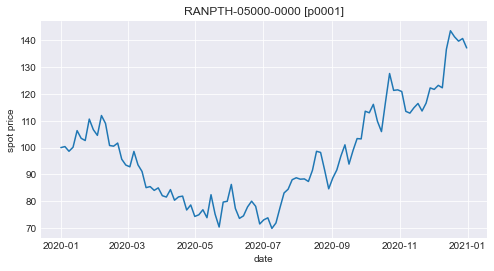

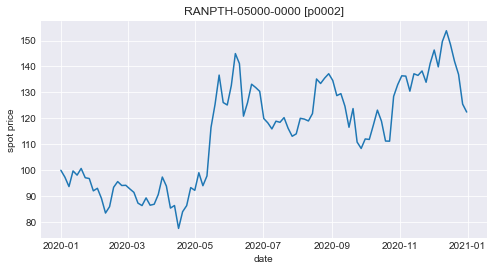

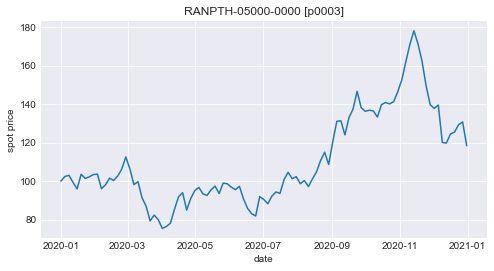

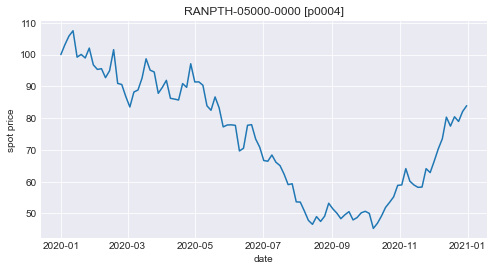

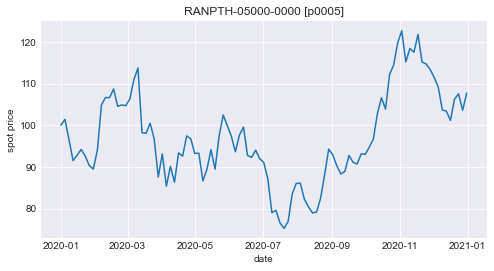

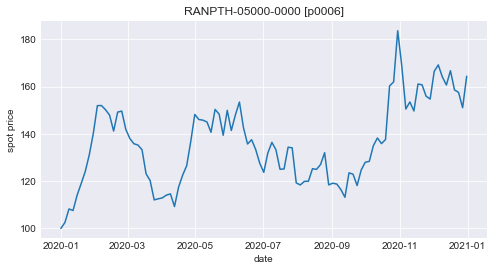

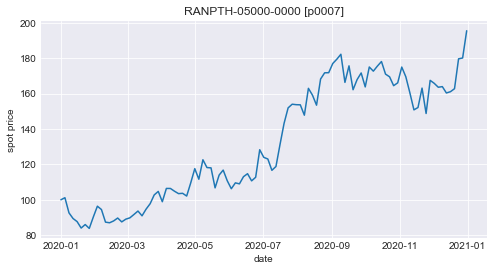

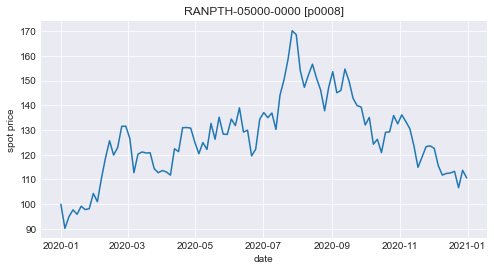

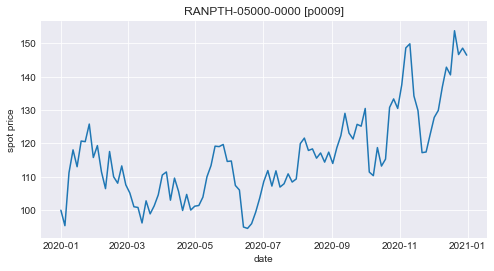

In [112]:
for col in cols[:100] if OUTPATH else cols[:10]:
    ser = pdread(fn, col)
    plt.title(f"{fn0} [{col}]")
    plt.plot(ser)
    plt.xlabel("date")
    plt.ylabel("spot price")
    plt.grid()
    if OUTPATH:
        savefn = f"{fn0}-{col}.png"
        print(f"saving as {savefn}")
        plt.savefig(j(OUTPATH, savefn))
    plt.show()
    

In [113]:
if OUTPATH:
    !ls {OUTPATH}/*.png

In [114]:
if OUTPATH:
    from fls import fsave
    filelist = os.listdir(OUTPATH)
    filelist = [fn for fn in filelist if fn[-4:]==".png"]
    markdown = "\n\n".join(f"![]({OUTPATH}/{fn})" for fn in filelist)
    fsave(markdown, "_charts.md", OUTPATH)
    !pandoc {OUTPATH}/_charts.md -o {OUTPATH}/_charts.docx